Analisis exploratorio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns

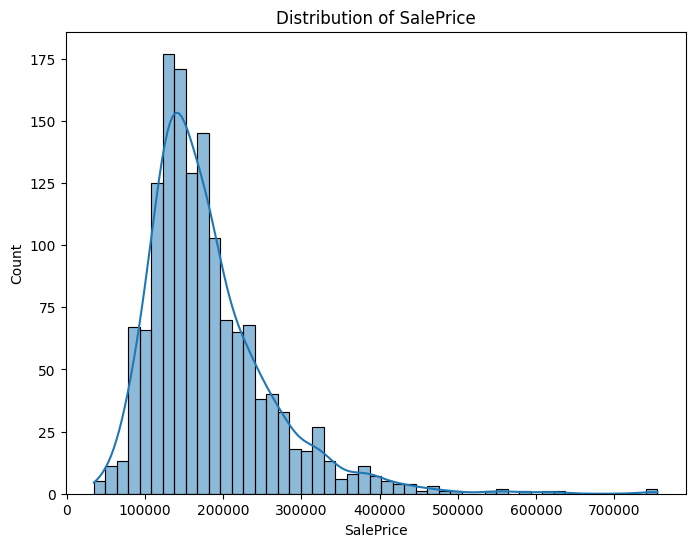

In [36]:
datos = pd.read_csv("train.csv", encoding="latin1")
datos.describe()
#np.mean(datos["LotArea"])
#np.mean(datos["SalePrice"])  '''
#SalePrice_mean: 

#datos.head()
columnas = list(datos.columns)
tipos = list(datos.dtypes)

    
numericas = datos.select_dtypes(include='number')
categoricas = datos.select_dtypes(include='object')


numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

plt.figure(figsize=(8, 6))
sns.histplot(numericas['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


Shape of the dataset:  (1460, 81)
First few rows of the dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  Y

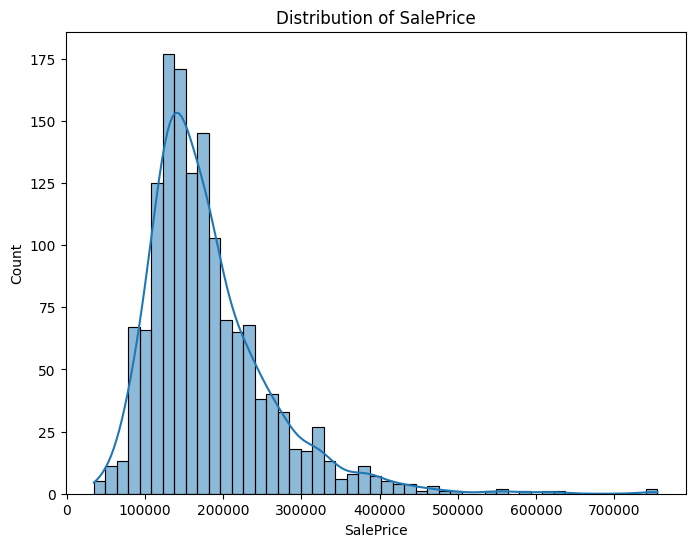

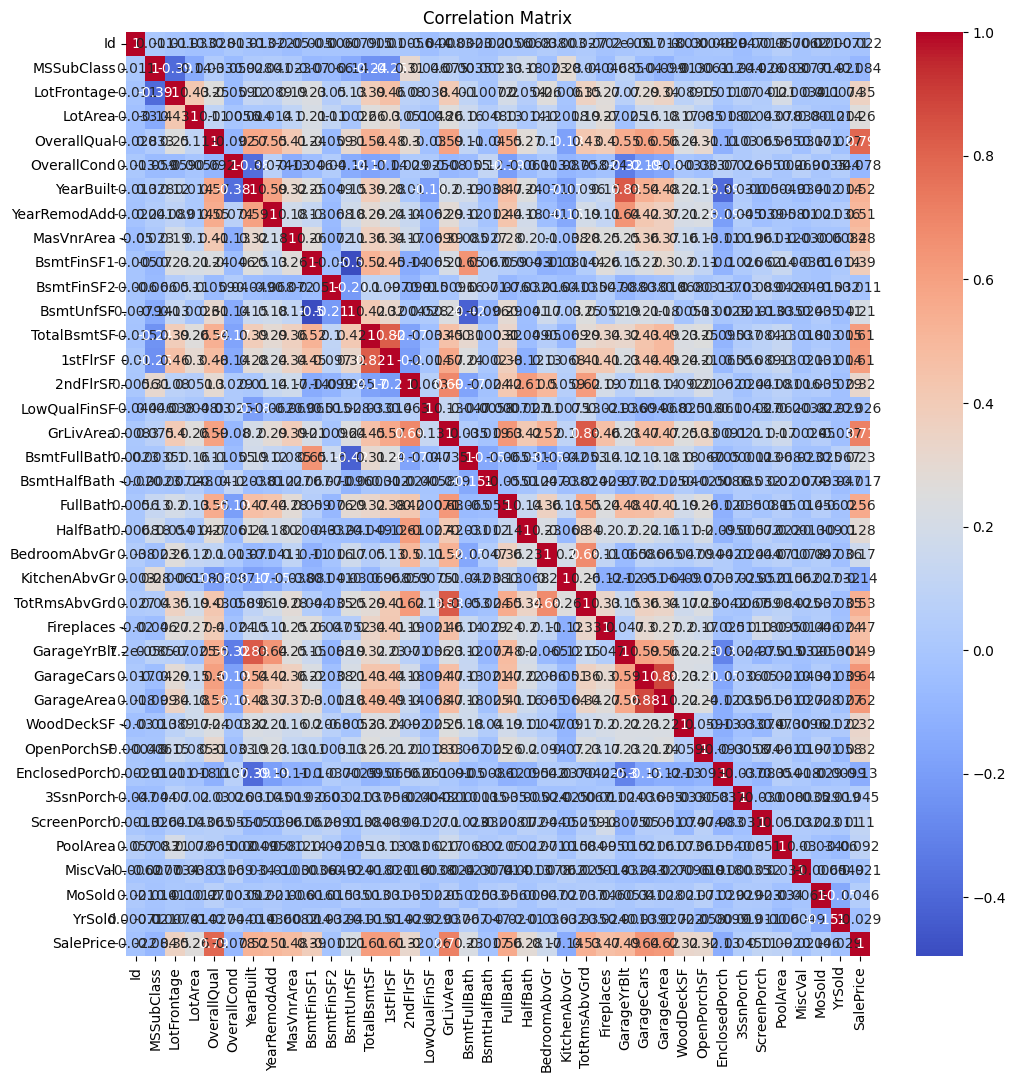

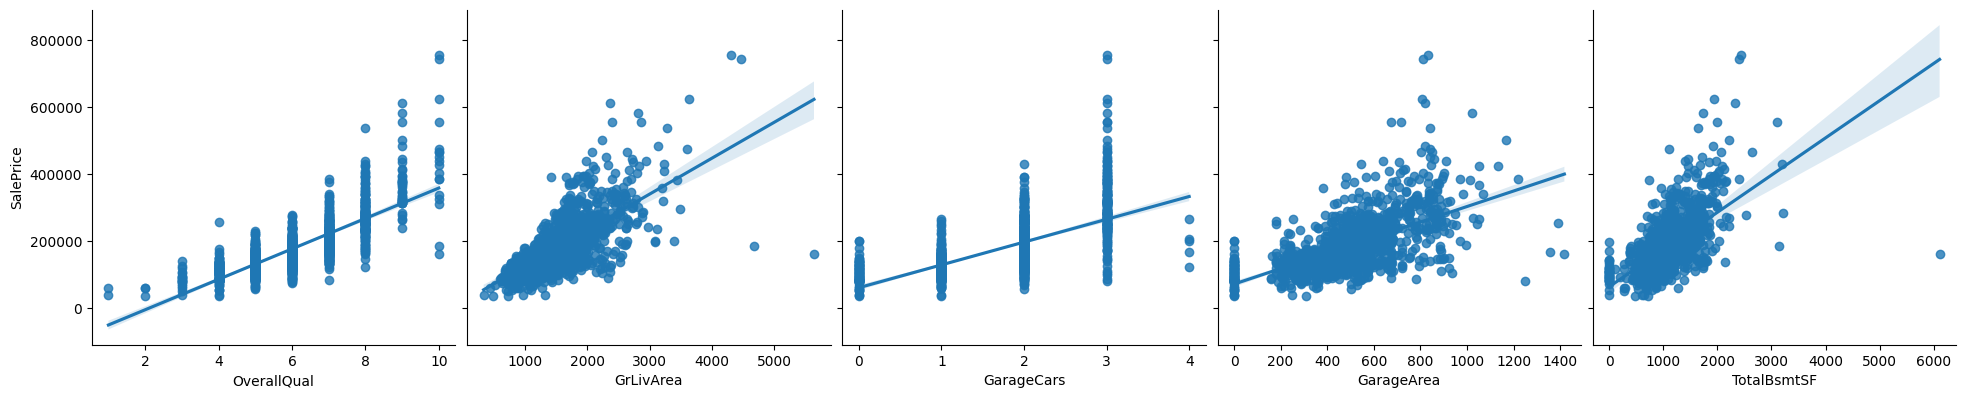

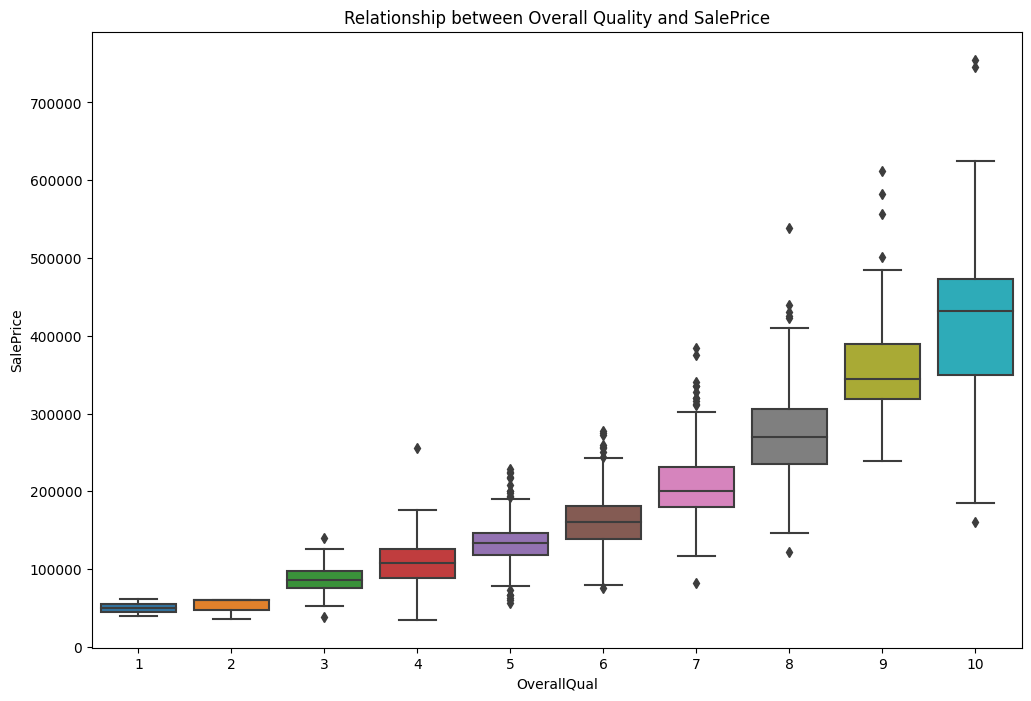

In [21]:


# Load the dataset
train_df = pd.read_csv('train.csv')

# Check the shape of the dataset
print("Shape of the dataset: ", train_df.shape)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(train_df.head())

# Check the data types of the variables
print("Data types of variables:")
print(train_df.dtypes)

# Check the summary statistics of the variables
print("Summary statistics of variables:")
print(train_df.describe())

# Check the missing values in the dataset
print("Missing values in the dataset:")
print(train_df.isnull().sum())

# Visualize the distribution of the target variable 'SalePrice'
plt.figure(figsize=(8, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Visualize the correlation between numerical variables
plt.figure(figsize=(12, 12))
sns.heatmap(train_df.select_dtypes(include='number').corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

# Visualize the relationship between SalePrice and the top correlated numerical variables
top_corr = train_df.select_dtypes(include='number').corr()['SalePrice'].abs().sort_values(ascending=False)[1:6].index
sns.pairplot(train_df, x_vars=top_corr, y_vars=['SalePrice'], height=4, aspect=1, kind='reg')
plt.show()

# Visualize the relationship between SalePrice and categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Relationship between Overall Quality and SalePrice')
plt.show()

